In [1]:
%load_ext autoreload
%autoreload 2

# imports
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
sys.path.append('../py_scripts')
import matplotlib.pyplot as plt
from py_scripts import MNISTDataModule, get_params_net_dataloader, ModelStyles, DataSet
import pytorch_lightning as pl

import wandb
import torch 
from pytorch_lightning.loggers import WandbLogger
import numpy as np

# gpu check
!nvidia-smi

SyntaxError: invalid syntax (Microzones.py, line 63)

In [4]:
import torch 
lol = torch.randn((1000, 10000)) # 1000 d input and 10000 into 10 layers of 1000 each

v, i = torch.topk(lol.view(1000, 10, 1000), k=10, dim=-1)
v.shape

torch.Size([1000, 10, 10])

In [51]:
lolz = torch.nn.Linear( 1000, 10000)
vals, inds = lolz.weight.min(dim=1, keepdim=True)
inds.shape

torch.Size([10000, 1])

In [52]:
top_k_mask = torch.ones_like(lolz.weight)
top_k_mask = top_k_mask.scatter(1, inds, 0)

In [53]:
inds[0]

tensor([319])

In [56]:
top_k_mask[0, inds[0]]

tensor([0.])

In [55]:
top_k_mask[0,:]

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 

In [40]:
lolz.weight.data[0,inds[0]]

tensor([-0.0315])

In [38]:
lolz.weight.data[0,:]

tensor([-2.2721e-02,  2.3182e-02,  2.4363e-02,  1.3467e-02, -2.2136e-02,
         2.8694e-02,  3.0001e-02,  8.0738e-03, -1.8713e-02, -2.3842e-03,
         9.2255e-03,  1.9670e-02, -1.7047e-02, -9.7258e-03, -2.6718e-02,
        -1.5851e-02,  1.3736e-02, -2.6243e-02,  1.1083e-02,  2.6184e-02,
         8.7867e-04, -1.1380e-02,  1.4225e-02, -2.7064e-03,  1.1194e-02,
        -1.3865e-02,  3.1515e-02, -2.0115e-03, -1.8368e-02,  2.1489e-02,
         1.6084e-02, -2.9771e-02,  2.8471e-02, -1.6413e-02, -2.0147e-02,
         1.6245e-02,  1.0539e-02,  2.1616e-03,  2.5163e-02, -2.3549e-03,
        -2.8709e-03, -1.4007e-03, -2.9935e-02,  8.5835e-03,  4.5045e-03,
         4.5965e-03, -2.6204e-02,  2.1963e-02,  2.0034e-02,  2.3175e-02,
         2.0428e-02,  2.3642e-02, -3.5536e-03,  7.0854e-03, -8.1709e-03,
         4.7010e-03, -1.8142e-02, -9.0118e-03, -1.2719e-03,  2.5873e-02,
        -7.8365e-03, -7.2247e-04,  4.3842e-04,  1.0004e-03, -2.9803e-02,
         2.1511e-02, -1.4619e-02, -1.6883e-02,  2.7

In [28]:
lolz.weight.data[:, inds] = 0

In [29]:
lolz.weight.data[0, :]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

## FloodFill

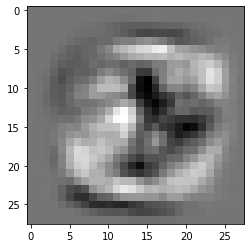

In [134]:
import cv2

img = cv2.imread('../data/test_images/ffn.png')
plt.imshow(img)
plt.show()

In [135]:
(x,y,_) = np.unravel_index(img.argmax(), img.shape)
x,y

(14, 12)

In [136]:
mask = np.zeros((30,30,1), dtype=np.uint8)
ldif = hdif = 30
cv2.floodFill(img, mask, (x,y), 1, (ldif, ldif, ldif), (hdif, hdif, hdif), flags=8) # 4 if share edge not corner
mask = mask[1:-1, 1:-1]

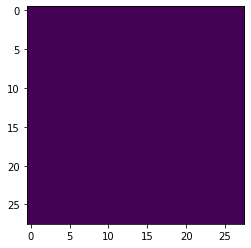

In [137]:
plt.imshow(mask[:,:,0])
plt.show()

In [138]:
print("Percentage of contiguous region", mask.mean())

Percentage of contiguous region 1.0


## Entropy

In [20]:

params = get_params(ModelStyles.SDM_CLASSIFICATION, DataSet.MNIST)
params.use_gaba_switch=True
params.k_decay_func = KDecayOptions.NO_DECAY
# set from nvidia-smi check
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model, data_module = get_net(params, load_from_checkpoint="/home/trenton/Foundational-SDM/wandb_Logger/Foundational-SDM/2rtc4ysk/checkpoints/epoch=499-step=234499.ckpt")
model = model.to(device)

Final params being used namespace(Frey_paper_rep_WT=False, act_func=ReLU(), active_threshold=0.3, all_positive_weights=True, batch_size=128, deep_sdm=False, epochs_to_train_for=200, gradient_clip=1000, nneurons=[1000], img_dim=28, input_size=784, k_decay_func=<KDecayOptions.LINEAR: 2>, k_max=999, k_min=10, k_transition_epochs_to_train_for=100, l1_loss_weight=None, l2_loss_weight=None, learn_addresses=True, lr=0.001, momentum=0.9, nchannels=1, nclasses=10, norm_addresses=True, norm_values=False, num_activations_for_gaba_switch=10000000, num_receptive_field_imgs=10, num_workers=5, opt='SGDM', output_size=10, positive_activations=True, print_every=False, reconstruction=False, sparsity_threshold=0.3, svdo=False, use_bias=False, use_gaba_switch=False, use_top_k=True)


In [23]:
model.neuron_activation_counters = torch.ones((1,params.nneurons[0]), requires_grad=False).to(device) * 1000000000000000

In [28]:
# evaluate the model: 
data_module.setup(None)
train_loader = data_module.train_dataloader()
test_loader = data_module.val_dataloader()

activation_storage = None
data_labels = []

for train_o_test, loader in zip(['Test'], [test_loader]):
    with torch.no_grad(): 
        accuracies = []
        for data in loader: 
            x, y = data
            x, y = x.to(device), y.to(device)
            logits, pre_active_values = model.forward(x, log_metrics=False)

            if activation_storage is None:
                activation_storage = pre_active_values
            else: 
                activation_storage = torch.cat([activation_storage,pre_active_values],dim=0)
            data_labels += list(y.cpu().numpy()) 
            
            b_accuracies = (logits.argmax(dim=1)==y)
            loss = model.compute_loss(logits, y, x)
            accuracies += list(b_accuracies.cpu().numpy())
        print(train_o_test," accuracy", np.mean(accuracies))




/home/trenton/anaconda3/lib/python3.8/site-packages/pytorch_lightning/core/datamodule.py:469: LightningDeprecationWarning: DataModule.setup has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.setup.
  rank_zero_deprecation(


Test  accuracy 0.9322


In [122]:
params.sparsity_threshold = 0.000001

In [138]:
import pandas as pd
data_labels = np.asarray(data_labels)

# ensure the number of data points in each class is the same: 
min_num = 892 # this is the max number in the val set for any class. 
inds_to_keep = []
for c in range(10):
    print(( data_labels==c).sum() )
    label_inds = np.arange(len(data_labels))[data_labels==c]
    chosen_inds = np.random.choice(label_inds, size=min_num, replace=False )
    inds_to_keep += list(chosen_inds)
inds_to_keep = np.asarray(inds_to_keep)

activation_storage = activation_storage[torch.from_numpy(inds_to_keep).type(torch.long)]
data_labels = data_labels[inds_to_keep]

# summing up all activations. 
# also computing metrics based upon class label. 

# this will give the baseline dead number
activity_per_neuron = activation_storage.sum(0)
# neurons responding to a given input. how many neurons are active. 
active_per_input = activation_storage.sum(1)
active_per_input_thresh = (activation_storage>params.active_threshold).type(torch.float).mean(1)
# what is the baseline dead n

# number that is dead using threshold. this is over all neurons. 
perc_dead_per_threshold = (activity_per_neuron < params.active_threshold).sum() / activation_storage.shape[1]

# get the data entropy

act_pdf = activation_storage / activity_per_neuron
act_pdf[0,0] = 0.0
z_inds = (act_pdf==0.0)
act_pdf[z_inds] += 0.000000000000001
data_ent = -(act_pdf * torch.log(act_pdf)).sum(0)

# get the class entropy. using pandas group by function
df = pd.DataFrame( activation_storage.cpu().numpy(), columns=list(np.arange(activation_storage.shape[1])) )
df["Labels"] = data_labels
df.set_index('Labels', inplace=True)

# this is entropy per each class which is not the one number I am looking for. 
'''
def class_ent(x):
    act_pdf = x / x.sum(0)
    return -(act_pdf * np.log(act_pdf)).sum(0)
class_ent = df.groupby("Labels").apply(class_ent)
'''

class_acts = df.groupby("Labels").agg('sum').values
act_pdf = class_acts / class_acts.sum(0)
act_pdf[0,0] = 0.0
z_inds = (act_pdf==0.0)
act_pdf[z_inds] += 0.000000000000001
class_ent = -(act_pdf * np.log(act_pdf)).sum(0)

# get sparsity
weight_sparsity_percentage = (model.fc1 < params.sparsity_threshold).sum(1) / params.input_size

892
892
892
892
892
892
892
892
892
892


torch.Size([1000])


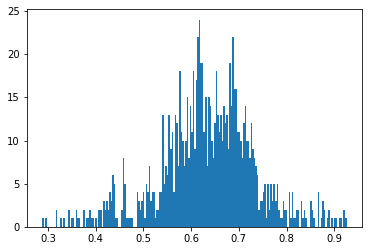

In [42]:
# a random input

print(activation_storage[0].shape)
plt.hist(activation_storage[0].cpu().numpy(), bins=200 )
plt.show()

torch.Size([1000])


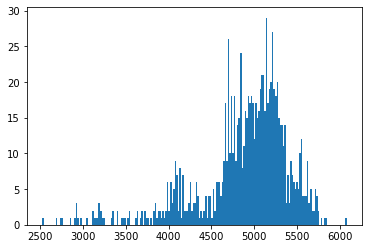

In [43]:
print(activity_per_neuron.shape)
plt.hist(activity_per_neuron.cpu().numpy(), bins=200 )
plt.show()

torch.Size([10000])


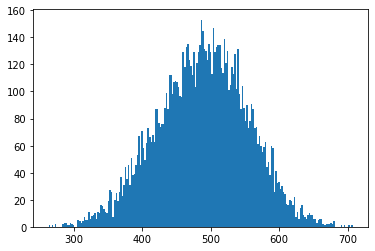

In [44]:
print(active_per_input.shape)
plt.hist(active_per_input.cpu().numpy(), bins=200 )
plt.show()

torch.Size([10000])


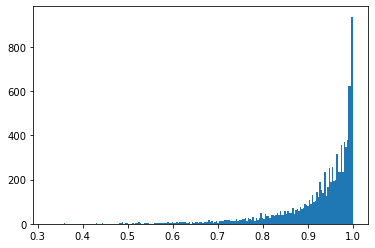

In [45]:
print(active_per_input_thresh.shape)
plt.hist(active_per_input_thresh.cpu().numpy(), bins=200 )
plt.show()

torch.Size([10000])


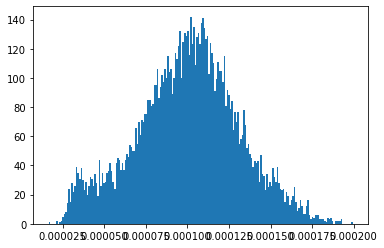

In [51]:
plt.hist(act_pdf[:,0].cpu().numpy(),bins=200)
print(act_pdf[:,0].shape)
# activation for a single neuron across all inputs

# probability is on teh x axis here. can see that a lot of them are somewhat activatved. and 
# a select few are very activated. 
plt.show()


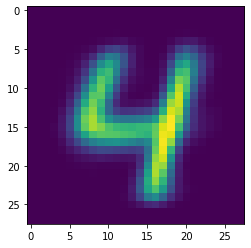

In [54]:
plt.imshow(model.fc1[0].detach().cpu().numpy().reshape([params.img_dim, params.img_dim]))
plt.show()

In [55]:
data_ent.shape

torch.Size([1000])

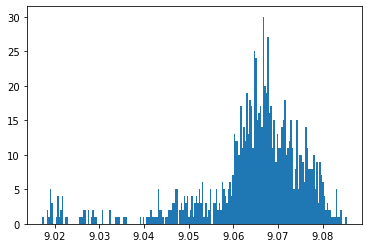

In [108]:
plt.hist(data_ent.cpu().numpy(), bins=200)
plt.show()

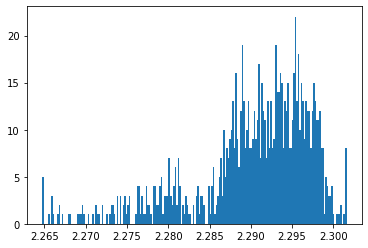

In [109]:
plt.hist(class_ent, bins=200)
plt.show()

In [111]:
np.argmin(class_ent), np.argmax(class_ent), np.log(10)

(897, 816, 2.302585092994046)

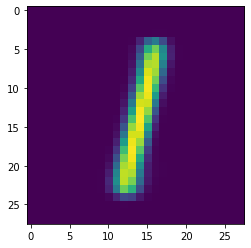

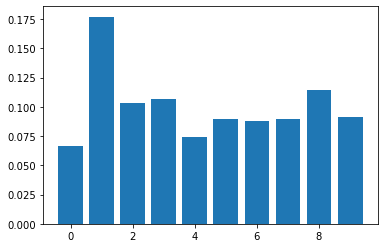

In [120]:
nind = 897

plt.imshow(model.fc1[nind].detach().cpu().numpy().reshape([params.img_dim, params.img_dim]))
plt.show()

plt.bar(np.arange(10), act_pdf[:,nind])
plt.show()

In [121]:
model.fc1[nind].detach().cpu().numpy().reshape([params.img_dim, params.img_dim])

array([[7.35852611e-12, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.91212541e-12,
        1.36539651e-11, 6.68982317e-12, 1.38689088e-15, 5.77878831e-17,
        0.00000000e+00, 4.86188867e-12, 1.29668993e-11, 0.00000000e+00,
        1.26348593e-11, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.34225131e-11, 7.73945925e-12, 8.65895029e-12],
       [5.36307544e-12, 1.10483896e-11, 1.31874893e-11, 0.00000000e+00,
        1.06935110e-16, 4.35303731e-16, 1.32480277e-11, 3.26974775e-14,
        2.49031193e-14, 2.73338074e-14, 4.78803065e-12, 4.13993969e-12,
        1.42691848e-13, 1.59380647e-12, 1.42284726e-11, 3.08511307e-11,
        1.60378204e-11, 9.56006281e-12, 7.84221212e-12, 3.07559493e-14,
        2.64006041e-14, 3.73222503e-13, 2.62048217e-12, 4.05510998e-12,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

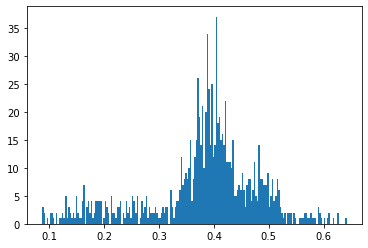

In [126]:
plt.hist(weight_sparsity_percentage.cpu().numpy(), bins=200)
plt.show()

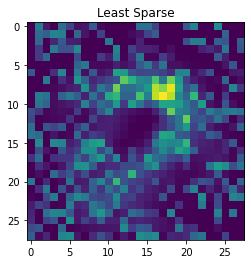

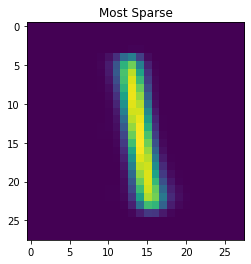

In [129]:

plt.imshow(model.fc1[torch.argmin(weight_sparsity_percentage)].detach().cpu().numpy().reshape([params.img_dim, params.img_dim]))
plt.title("Least Sparse")
plt.show()

plt.imshow(model.fc1[torch.argmax(weight_sparsity_percentage)].detach().cpu().numpy().reshape([params.img_dim, params.img_dim]))
plt.title("Most Sparse")
plt.show()